# Possível resolução para as questões 4, 5 e 10, da lista 1.

## Questão 4

## Questão 5

## Questão 10

Resolução proposta pelo aluno Eduardo Henrique

Número de vizinhos: 1  ---> F-measure: 0.89  ---- Cross validation: 0.96
Número de vizinhos: 2  ---> F-measure: 0.89  ---- Cross validation: 0.95
Número de vizinhos: 3  ---> F-measure: 0.92  ---- Cross validation: 0.97
Número de vizinhos: 4  ---> F-measure: 0.92  ---- Cross validation: 0.97
Número de vizinhos: 5  ---> F-measure: 0.95  ---- Cross validation: 0.97
Número de vizinhos: 6  ---> F-measure: 0.95  ---- Cross validation: 0.98
Número de vizinhos: 7  ---> F-measure: 0.97  ---- Cross validation: 0.98
Número de vizinhos: 8  ---> F-measure: 0.95  ---- Cross validation: 0.97
Número de vizinhos: 9  ---> F-measure: 0.97  ---- Cross validation: 0.97


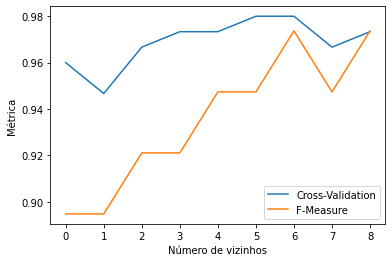

In [1]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score, train_test_split
from matplotlib import pyplot as plt

x, y = datasets.load_iris(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 20)
f = []
cross = []
for i in range(1,10):
  knn = KNeighborsClassifier(i).fit(x_train, y_train)
  y_predict =  knn.predict(x_test)

  f_measure_score = f1_score(y_test, y_predict, average = 'micro')
  cross_validation_score = cross_val_score(knn, x, y)
  f.append(f_measure_score)
  cross.append(cross_validation_score.mean())
  print("Número de vizinhos: %d"%(i)," ---> F-measure: %0.2f"%(f_measure_score), " ---- Cross validation: %0.2f"%(cross_validation_score.mean()))

plt.plot(range(9), cross, label = "Cross-Validation")
plt.plot(range(9), f, label='F-Measure')
plt.xlabel('Número de vizinhos')
plt.ylabel('Métrica')
plt.legend()
plt.show()